In [ ]:
import os
import fitz  # PyMuPDF
import spacy
import pandas as pd
import re

In [16]:
!pip install pymupdf


In [17]:
nlp = spacy.load("en_core_web_sm")

In [18]:
def extract_text_from_pdf(pdf_path):
    """Extract text from a PDF file."""
    doc = fitz.open(pdf_path)
    text = "\n".join([page.get_text("text") for page in doc])
    return text

In [19]:
def extract_name(text):
    """Extract name from the resume using Named Entity Recognition (NER)."""
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            return ent.text
    return "Not Found"

In [20]:
def extract_experience(text):
    """Extract years of experience using regex."""
    match = re.search(r'(\d+)\+?\s*(years|yrs|year)\s*(of\s*experience)?', text, re.IGNORECASE)
    return match.group(1) if match else "Not Found"

In [21]:
def extract_skills(text):
    """Extract soft and hard skills from predefined skill sets."""
    soft_skills = {"communication", "leadership", "teamwork", "problem-solving", "adaptability", "creativity"}
    hard_skills = {"python", "java", "sql", "machine learning", "data analysis", "cloud computing"}

    found_soft_skills = [skill for skill in soft_skills if skill.lower() in text.lower()]
    found_hard_skills = [skill for skill in hard_skills if skill.lower() in text.lower()]

    return ", ".join(found_soft_skills), ", ".join(found_hard_skills)

In [22]:
def process_resumes(folder_path, output_csv):
    """Process all resumes in a folder and save extracted data to CSV."""
    data = []

    for file in os.listdir(folder_path):
        if file.endswith(".pdf"):
            pdf_path = os.path.join(folder_path, file)
            text = extract_text_from_pdf(pdf_path)
            name = extract_name(text)
            experience = extract_experience(text)
            soft_skills, hard_skills = extract_skills(text)

            data.append([name, soft_skills, hard_skills, experience])

    df = pd.DataFrame(data, columns=["Name", "Soft Skills", "Hard Skills", "Experience (Years)"])
    df.to_csv(output_csv, index=False)
    print(f"Data saved to {output_csv}")

In [23]:
# Example usage
folder_path = "/content/drive/MyDrive/resumes"  # Update with your folder path
output_csv = "extracted_resume_data.csv"
process_resumes(folder_path, output_csv)


Data saved to extracted_resume_data.csv


In [24]:
!pip install pandas networkx scikit-learn sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [26]:
import pandas as pd
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import re

# Load dataset
df = pd.read_csv("/content/extracted_resume_data.csv")

# Load sentence transformer model
try:
    model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Check your Hugging Face token or model name.")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [32]:
print(df)

                              Name  \
0                       Anna White   
1                      Emily Davis   
2                     Laura Garcia   
3  Resume - Michael Johnson \nName   
4                     Sarah Wilson   
5                     James Martin   
6                      Chris Brown   

                                         Soft Skills  \
0  communication, leadership, creativity, adaptab...   
1    communication, leadership, creativity, teamwork   
2            communication, creativity, adaptability   
3  communication, problem-solving, leadership, te...   
4  communication, problem-solving, creativity, te...   
5              problem-solving, creativity, teamwork   
6  problem-solving, leadership, creativity, teamw...   

                      Hard Skills  Experience (Years)  
0                             sql                   6  
1                machine learning                  10  
2        machine learning, python                   5  
3          machine lea

In [37]:
def build_graph(df):
    G = nx.Graph()

    for _, row in df.iterrows():
        candidate = row["Name"]
        skills = row["Hard Skills"].split(", ") + row["Soft Skills"].split(", ")
        experience = row["Experience (Years)"]
        G.add_node(candidate, type="candidate", experience=experience)

        for skill in skills:
            G.add_node(skill, type="skill")
            G.add_edge(candidate, skill, weight=1 / (experience + 1))

    return G


In [38]:
def get_skill_similarity(skill1, skill2):
    try:
        embeddings = model.encode([skill1, skill2])
        return cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
    except Exception as e:
        print(f"Error computing similarity for {skill1} and {skill2}: {e}")
        return 0  # Return 0 similarity if there's an error

def extract_info_from_text(job_text):
    # Extract years of experience
    experience_match = re.search(r'(\d+)\s+years?', job_text, re.IGNORECASE)
    min_experience = int(experience_match.group(1)) if experience_match else 0

    # Extract skills
    skills_match = re.search(r'skills:\s*(.+)', job_text, re.IGNORECASE)
    job_skills = skills_match.group(1).split(", ") if skills_match else []

    return {"Skills": job_skills, "Experience": min_experience}


In [39]:
def match_candidates(job_text, G):
    job_description = extract_info_from_text(job_text)
    job_skills = job_description["Skills"]
    min_experience = job_description["Experience"]

    best_candidates = []

    for candidate in [n for n in G.nodes if G.nodes[n].get("type") == "candidate"]:
        candidate_skills = list(G.neighbors(candidate))
        candidate_experience = G.nodes[candidate]["experience"]

        match_score = sum(1 for skill in job_skills if skill in candidate_skills)

        for job_skill in job_skills:
            for candidate_skill in candidate_skills:
                similarity = get_skill_similarity(job_skill, candidate_skill)
                if similarity > 0.8:
                    match_score += similarity

        if candidate_experience >= min_experience:
            best_candidates.append((candidate, match_score, candidate_experience))

    best_candidates.sort(key=lambda x: x[1], reverse=True)
    return best_candidates


In [40]:
# Example job description as a text string
job_text = """
We are looking for a candidate with at least 5 years of experience in software development.
Required skills: Python, Machine Learning, TensorFlow, Deep Learning.
"""

# Build graph and find best candidates
G = build_graph(df)
matched_candidates = match_candidates(job_text, G)




In [41]:
# Convert to Pandas DataFrame and display as a table
result_df = pd.DataFrame(matched_candidates, columns=["Candidate Name", "Skill Score", "Experience"])
print(result_df)


  Candidate Name  Skill Score  Experience
0   Laura Garcia          2.0           5
1   James Martin          2.0          11
2    Chris Brown          2.0          15
3    Emily Davis          1.0          10
4     Anna White          0.0           6
5   Sarah Wilson          0.0           7


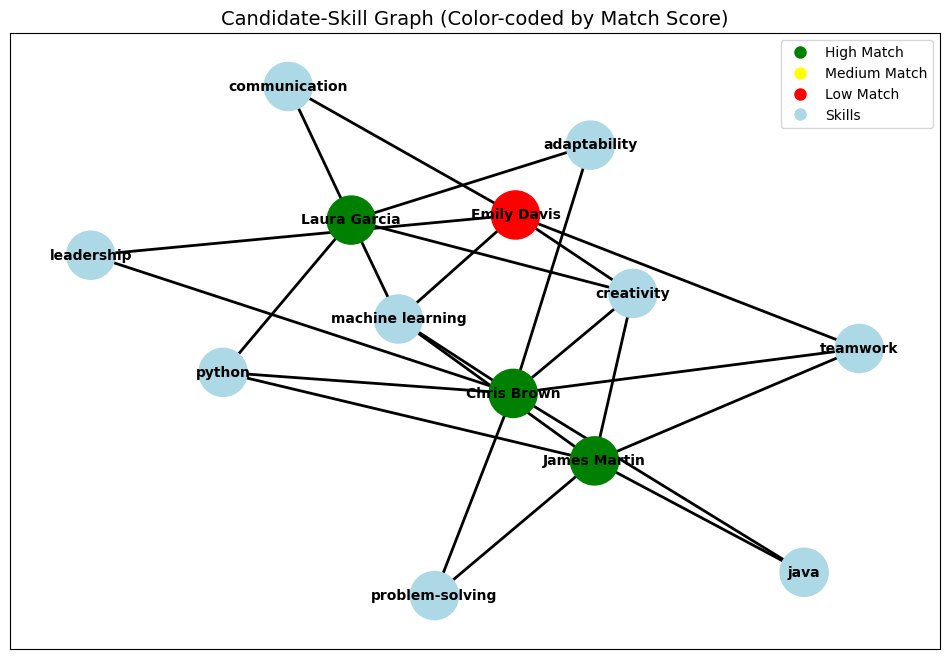

In [42]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_colored_graph(G, matched_candidates):
    plt.figure(figsize=(12, 8))

    # Ensure each candidate tuple has exactly two elements
    filtered_candidates = [(c[0], c[1]) for c in matched_candidates if len(c) >= 2 and c[1] > 0]

    if not filtered_candidates:
        print("No candidates with match score > 0.")
        return

    # Normalize match scores for color coding
    scores = [c[1] for c in filtered_candidates]
    min_score, max_score = min(scores), max(scores)

    def get_node_color(score):
        """Assigns color to nodes based on score intensity."""
        if max_score - min_score == 0:  # Avoid division by zero
            normalized = 0.5
        else:
            normalized = (score - min_score) / (max_score - min_score)

        if normalized > 0.7:
            return "green"  # High match
        elif normalized > 0.4:
            return "yellow"  # Medium match
        else:
            return "red"  # Low match

    # Create a subgraph with only relevant candidates and their skills
    subG = nx.Graph()

    candidate_colors = {}  # Store colors for candidates

    for candidate, match_score in filtered_candidates:
        candidate_experience = G.nodes[candidate].get("experience", 0)  # Avoid KeyError
        subG.add_node(candidate, type="candidate", experience=candidate_experience)
        candidate_colors[candidate] = get_node_color(match_score)  # Assign color

        for skill in G.neighbors(candidate):
            edge_weight = 1 / (candidate_experience + 1)  # More experience = shorter edge
            subG.add_node(skill, type="skill")
            subG.add_edge(candidate, skill, weight=edge_weight)

    # Define positions using a spring layout
    pos = nx.spring_layout(subG, seed=42, weight="weight")

    # Separate candidates and skills
    candidates = [n for n in subG.nodes if subG.nodes[n].get("type") == "candidate"]
    skills = [n for n in subG.nodes if subG.nodes[n].get("type") == "skill"]

    # Assign colors to nodes (candidates → match score colors, skills → light blue)
    node_colors = [candidate_colors[n] if n in candidate_colors else "lightblue" for n in subG.nodes]

    # Draw nodes
    nx.draw_networkx_nodes(subG, pos, nodelist=subG.nodes, node_color=node_colors, node_size=1200)

    # Draw edges
    nx.draw_networkx_edges(subG, pos, width=2)

    # Draw labels
    nx.draw_networkx_labels(subG, pos, font_size=10, font_weight="bold")

    # Create legend for candidate colors
    legend_patches = [
        plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="green", markersize=10, label="High Match"),
        plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="yellow", markersize=10, label="Medium Match"),
        plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="red", markersize=10, label="Low Match"),
        plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="lightblue", markersize=10, label="Skills"),
    ]
    plt.legend(handles=legend_patches, loc="best")

    plt.title("Candidate-Skill Graph (Color-coded by Match Score)", fontsize=14)
    plt.show()

# Call function after computing matched candidates
visualize_colored_graph(G, matched_candidates)


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_match_score_table(matched_candidates):
    # Ensure valid candidates (with match score > 0)
    filtered_candidates = [(c[0], c[1]) for c in matched_candidates if len(c) >= 2 and c[1] > 0]

    if not filtered_candidates:
        print("No candidates with match score > 0.")
        return

    # Extract scores
    scores = np.array([c[1] for c in filtered_candidates])
    min_score, max_score = scores.min(), scores.max()

    # Normalize scores to a range [0,1]
    if max_score - min_score == 0:
        normalized_scores = np.ones_like(scores) * 0.5  # If all scores are the same, use mid-scale color
    else:
        normalized_scores = (scores - min_score) / (max_score - min_score)

    # Convert normalized values to a colormap
    cmap = plt.get_cmap("RdYlGn")  # Red → Yellow → Green colormap
    colors = [cmap(norm) for norm in normalized_scores]

    # Create DataFrame with color-coded candidates
    candidates_df = pd.DataFrame(filtered_candidates, columns=["Candidate", "Match Score"])
    candidates_df["Color"] = [plt.matplotlib.colors.to_hex(c) for c in colors]  # Convert RGB to HEX

    # Sorting by match score (descending)
    candidates_df = candidates_df.sort_values(by="Match Score", ascending=False)

    # Print candidates with assigned dynamic colors
    print("\n🎨 **Dynamic Color-Coded Candidates**")
    print(candidates_df.to_string(index=False))

    # Identify best candidates
    best_candidate = candidates_df.iloc[0] if not candidates_df.empty else ("N/A", "N/A", "N/A")

    print(f"\n🏆 **Best Match Candidate:** {best_candidate['Candidate']} with Score {best_candidate['Match Score']}")

# Call function after computing matched candidates
generate_match_score_table(matched_candidates)



🎨 **Dynamic Color-Coded Candidates**
   Candidate  Match Score   Color
Laura Garcia          2.0 #006837
James Martin          2.0 #006837
 Chris Brown          2.0 #006837
 Emily Davis          1.0 #a50026

🏆 **Best Match Candidate:** Laura Garcia with Score 2.0000001192092896
